In [16]:
# load all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the database and show some data
Data = pd.read_csv('G:\ML & AI 99DaysWithCPC\Python Basics\Project 1\Auto Sales data.csv')

print(Data.head())

   QUANTITYORDERED  PRICEEACH    SALES   ORDERDATE COUNTRY DEALSIZE
0             30.0      95.70  2871.00  24/02/2018     USA    Small
1             34.0      81.35  2765.90    7/5/2018  France    Small
2             41.0      94.74  3884.34    1/7/2018  France   Medium
3             45.0      83.26  3746.70  25/08/2018     USA   Medium
4             36.0      96.66  3479.76  28/10/2018     NaN   Medium


In [4]:
# show data info
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2735 non-null   float64
 1   PRICEEACH        2690 non-null   float64
 2   SALES            2702 non-null   float64
 3   ORDERDATE        2690 non-null   object 
 4   COUNTRY          2686 non-null   object 
 5   DEALSIZE         2723 non-null   object 
dtypes: float64(3), object(3)
memory usage: 128.9+ KB
None


In [6]:
# try to fill missing values other delete raw

Data['ORDERDATE'] = pd.to_datetime(Data['ORDERDATE'], format='%d/%m/%Y', errors='coerce')
Data['QUANTITYORDERED'].fillna(Data['QUANTITYORDERED'].mean(), inplace=True)
Data['PRICEEACH'].fillna(Data['PRICEEACH'].mean(), inplace=True)
Data['SALES'].fillna(Data['SALES'].mean(), inplace=True)

Data.dropna(subset=['COUNTRY'], inplace=True)
Data.dropna(subset=['DEALSIZE'], inplace=True)

# Remove all duplicates
Data.drop_duplicates(inplace = True)


print(Data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2663 entries, 0 to 2746
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   QUANTITYORDERED  2663 non-null   float64       
 1   PRICEEACH        2663 non-null   float64       
 2   SALES            2663 non-null   float64       
 3   ORDERDATE        2606 non-null   datetime64[ns]
 4   COUNTRY          2663 non-null   object        
 5   DEALSIZE         2663 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 145.6+ KB
None


In [8]:
# Descriptive statistics for QUANTITYORDERED column
print("Mean QUANTITYORDERED:", Data['QUANTITYORDERED'].mean())
print("Median QUANTITYORDERED:", Data['QUANTITYORDERED'].median())
print("QUANTITYORDERED Variance:", Data['QUANTITYORDERED'].var())
print("QUANTITYORDERED Std Dev:", Data['QUANTITYORDERED'].std())

Mean QUANTITYORDERED: 35.11874403172735
Median QUANTITYORDERED: 35.0
QUANTITYORDERED Variance: 95.5062262977555
QUANTITYORDERED Std Dev: 9.772728702760325


In [9]:
# Descriptive statistics for PRICEEACH column
print("Mean PRICEEACH:", Data['PRICEEACH'].mean())
print("Median PRICEEACH:", Data['PRICEEACH'].median())
print("PRICEEACH Variance:", Data['PRICEEACH'].var())
print("PRICEEACH Std Dev:", Data['PRICEEACH'].std())

Mean PRICEEACH: 101.0266759601143
Median PRICEEACH: 96.49
PRICEEACH Variance: 1725.3063235618572
PRICEEACH Std Dev: 41.53680685322185


In [10]:
# Descriptive statistics for SALES column
print("Mean SALES:", Data['SALES'].mean())
print("Median SALES:", Data['SALES'].median())
print("SALES Variance:", Data['SALES'].var())
print("SALES Std Dev:", Data['SALES'].std())

Mean SALES: 3558.1178921873425
Median SALES: 3211.38
SALES Variance: 3345262.5205131355
SALES Std Dev: 1829.0058831269887


In [19]:
# average sales by Country
avg_sales_country = Data.groupby('COUNTRY')['SALES'].mean()

print("Average Sales by Country (sorted):\n", avg_sales_country)

Average Sales by Country (sorted):
 COUNTRY
Australia      3408.930878
Austria        3673.864182
Belgium        3343.498429
Canada         3233.808778
Denmark        3974.411124
Finland        3617.028048
France         3532.255272
Germany        3604.306438
Ireland        3786.215210
Italy          3327.575949
Japan          3573.064902
Norway         3620.383548
Philippines    3647.762800
Singapore      3625.519359
Spain          3553.257550
Sweden         3670.365206
Switzerland    3879.342857
UK             3313.121558
USA            3618.115478
Name: SALES, dtype: float64


In [21]:
# calculate average dealsize 
avg_sales_dealsize = Data.groupby('DEALSIZE')['SALES'].mean()
print("Average Sales by Deal Size:\n", avg_sales_dealsize)

Average Sales by Deal Size:
 DEALSIZE
Large     8246.789647
Medium    4392.526075
Small     2091.696260
Name: SALES, dtype: float64


In [29]:
# calculate expacted sales per day
expected_sales = (avg_sales_dealsize * Data['DEALSIZE'].value_counts(normalize=True)).sum()
print(f"Expected Sales per Order: {expected_sales:.2f}")

Expected Sales per Order: 3558.12


In [31]:
# probability of an order from USA
prob_usa = (Data['COUNTRY'] == 'USA').mean()
print(f"Probability of an order being from USA: {prob_usa:.2f}")

Probability of an order being from USA: 0.34


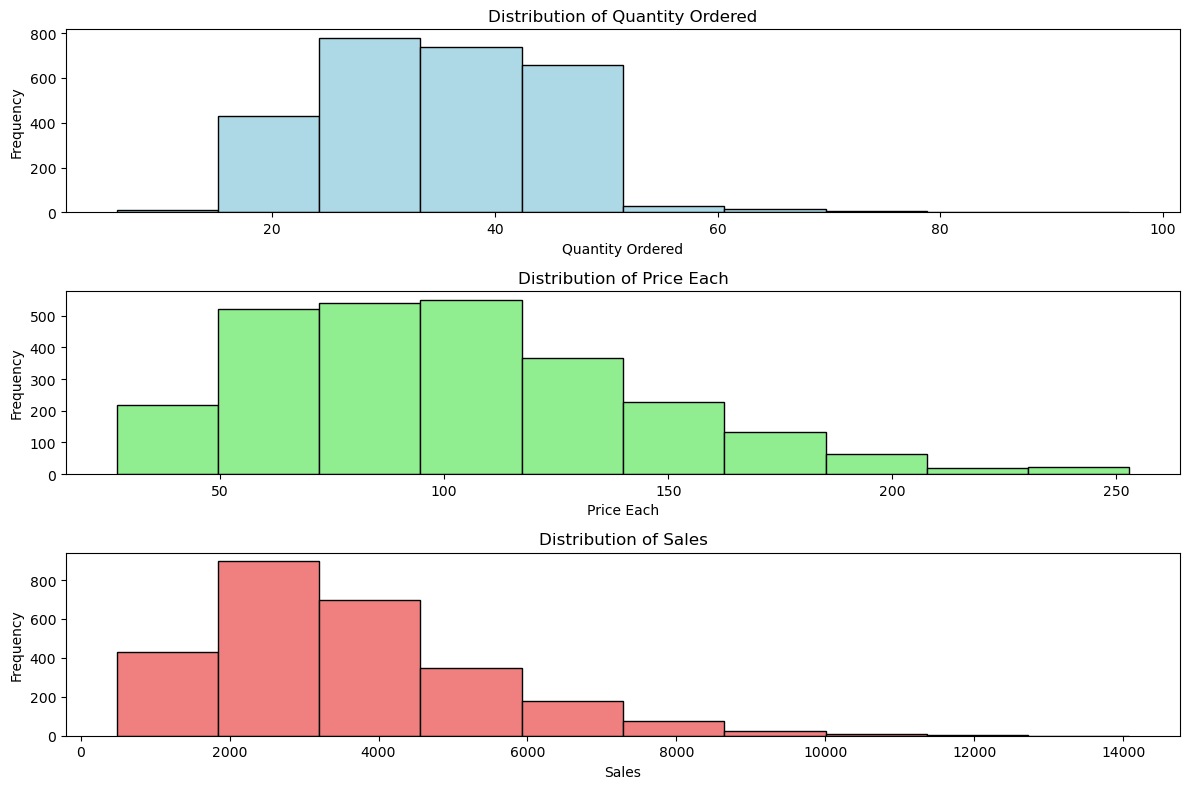

In [22]:
# Plot histograms for each column
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.hist(Data['QUANTITYORDERED'], bins=10, color='lightblue', edgecolor='black')
plt.title('Distribution of Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(Data['PRICEEACH'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Price Each')
plt.xlabel('Price Each')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(Data['SALES'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

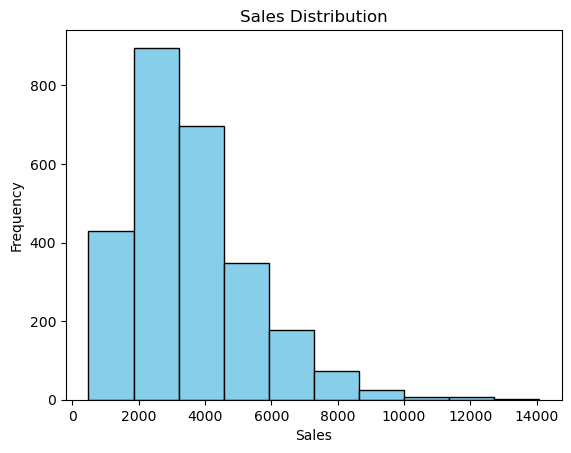

In [33]:
# Visualization
plt.hist(Data['SALES'], bins=10, color='skyblue', edgecolor='black')
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

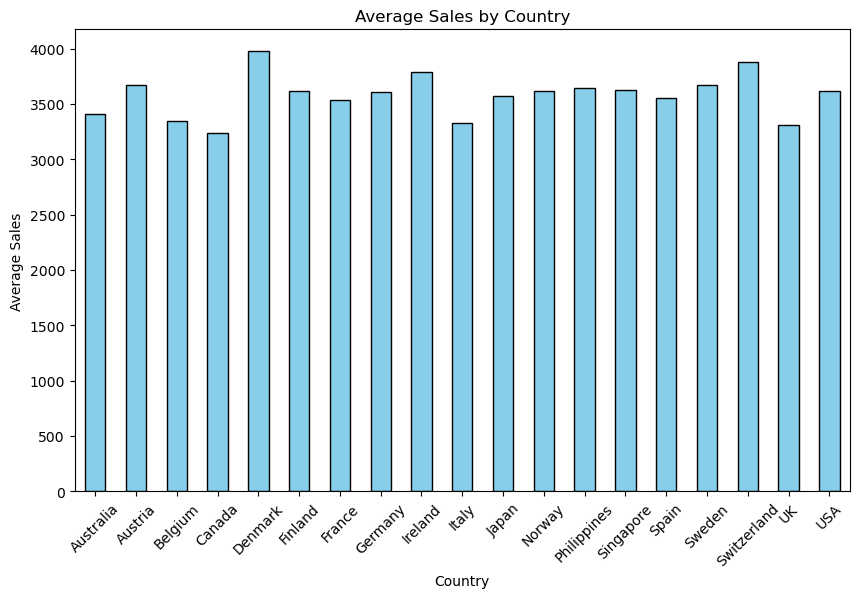

In [37]:
# Bar Plot for Average Sales by Country
avg_sales_country = Data.groupby('COUNTRY')['SALES'].mean()

plt.figure(figsize=(10, 6))
avg_sales_country.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Sales by Country')
plt.xlabel('Country')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()